Notebook will be adapted to review drift for chemo taxis 

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt
import numpy as np
import brown_util as bu

In [6]:
# insert and load the names of the pkl files that you made using the yamlFile to change the parameters
# calculate the mean square displacements for each pkl file
# plot the simulated trajectories of the particles


#listofTrajectories= ["crowder_EK_1_crowders.pkl","crowder_EK_4_crowders.pkl","crowder_EK_9_crowders.pkl","crowder_EK_16_crowders.pkl","crowder_EK_25_crowders.pkl","crowder_EK_36_crowders.pkl","crowder_EK_49_crowders.pkl"]
listofTrajectories= ["expt_cellRad0.100000_00.pkl"]
path="/home/pkh-lab-shared/migration/231004/"
for trajectory in listofTrajectories:
    ts,xs,ys, nUpdates, nParticles = bu.LoadPKLData(path+trajectory)
    msds= bu.meanSquareDisplacements(xs, ys, nUpdates)
    print(msds[-1])


2570.3045701136007


(21, 320)

Computing drift in x direction

In [15]:
dx = xs[:,-1]


(array([1., 0., 1., 3., 7., 3., 1., 3., 0., 2.]),
 array([-158.35162354, -127.83858032,  -97.32553711,  -66.8124939 ,
         -36.29945068,   -5.78640747,   24.72663574,   55.23967896,
          85.75272217,  116.26576538,  146.77880859]),
 <a list of 10 Patch objects>)

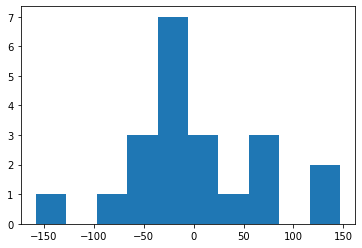

In [18]:
plt.hist(dx)